### Download the data
Let's download and uncompress our data and images here:

In [1]:
import platform
display(platform.system())
import os
file_download_link = 'https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0'
if os.name == 'nt':
    print('Please download your dataset here:', file_download_link)
else:
    # We need to first download the data here:
    !wget -O data.zip "$file_download_link" -o /dev/null
    !unzip data.zip > /dev/null

'Windows'

Please download your dataset here: https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0


In [2]:
# If your data is on google drive then uncomment the code below to access
# your google drive.
#from google.colab import drive
#drive.mount('/content/drive')

## Running Tensorflow Keras on our Titanic dataset (25 points)
[tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/Model), [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
### Q1: We will now implement customization via Keras. Be creative building you NN.
Make sure you set the verbose parameter to 0 when you train your model. Not doing so will result in your TA's being unable to grade your submission.
You can use history to plot your Loss/Metrics.
Make sure you generate a Loss/Metrics plot for each question.

In [3]:
# Prerequisite library imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Let's reimport our data
df = pd.read_csv('C:/Users/16262/Downloads/hw3data (1)/data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')


C:\Users\16262\AppData\Local\Temp\ipykernel_23376\4147045159.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
y.unique()

array([0, 1], dtype=int64)

### 1.1) Based on the imports above we will use those keras libraries to build our models. Here we want to implement a form of scaling to your data either minmax normalization or standardization using the sklearn.preprocessing libraries. Justify why you chose one over the other. Is this classfication or regression? (10 points)

It should be classfication. As we can see that in y(target) are only two value 0 and 1. it means that it is a binary and  the goal is to predict a binary outcome (yes or not) for 0 and 1. since the target variable ('Survived') is categorical, indicating whether a passenger survived (1) or did not survive (0). 

In [5]:
# Please use your scalarization of X here: then run the cell below to split your training and test data.
# Scalarization means normalizing or standardizing
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

In [7]:
# Write your model, and training here
model = Sequential()
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [8]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points)

Here is the example code you can use to build your own DNN after you check the shape of your X matrix. Similar to HW2
```python
# Hint! You can start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))
```


In [9]:
# Let's initialize our model
model = Sequential() # Initialising the ANN/DNN

In [10]:
# Let's Check the shape of our data!
# This should match your input layer
X.shape

(792, 14)

In [11]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
# Please use the example code above in the hint.
input_dim = X_train.shape[1]  # Number of features

MYACTIVATIONFXN = 'relu'  
model.add(Dense(units=14, activation=MYACTIVATIONFXN, input_dim=input_dim))
model.add(Dense(units=10, activation='relu'))  
model.add(Dense(units=1, activation='sigmoid')) 

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [12]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


Implement tensorflows [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) library. Feel free to play with the settings and parameters

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

### Here we will run our ANN/DNN using the fit function using a batch size of 1 and 10 epochs
Early stopping has been added to your model.fit call

In [14]:
# I have provided the code for you here:
# Feel free to play around with the code as you please
#WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
#history = model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10, callbacks = [early_stopping], verbose = 0)
history = model.fit(X_train_scaled, y_train, batch_size=1, epochs=10, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping], verbose=0)
print(history.history)


{'loss': [0.5671220421791077, 0.476929634809494, 0.45057040452957153], 'val_loss': [0.522361159324646, 0.484771192073822, 0.4897269904613495]}


### 1.3) How does the error (in terms of accuracy, precission or recall) differ between your models from hw2? Write in one paragraph or less how the error differs and why. (5 points)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Round predictions for binary classification
y_train_pred_round = y_train_pred.round()
y_test_pred_round = y_test_pred.round()

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_round)
test_accuracy = accuracy_score(y_test, y_test_pred_round)

# Calculate precision
train_precision = precision_score(y_train, y_train_pred_round)
test_precision = precision_score(y_test, y_test_pred_round)

# Calculate recall
train_recall = recall_score(y_train, y_train_pred_round)
test_recall = recall_score(y_test, y_test_pred_round)

# Print results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)


5/5 [==============================] - 0s 987us/step
Train Accuracy: 0.8214849921011058
Test Accuracy: 0.7421383647798742
Train Precision: 0.8028846153846154
Test Precision: 0.7166666666666667
Train Recall: 0.698744769874477
Test Recall: 0.6417910447761194


In Hw 2, I get the Accuracy:0.9114946749908189,Precision: 0.9256398534020394 ,Recall: 0.9284617833622503 for the test part And in here we get the test Accuracy: 0.7672955974842768,test Precision: 0.7777777777777778 and test Precision: 0.7777777777777778. We can see that Hw 2 we are  uses a Keras Sequential model with Dense layers, sigmoid activation functions, and Stochastic Gradient Descent (SGD) as the optimizer.And even thought we are also use Kera Sequential but different activation functions, the optimizer, the complexity of the model. It cause different result.And it also have different dataset. 

## 2) Complex fit of flowers (30 points)

The cool stuff starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well! This is similar to our example on tf playground.

Let's get started!

First we need to import the data:

In [16]:
import numpy as np
data = np.load('C:/Users/16262/Downloads/hw3data (1)/data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [17]:
import matplotlib.pyplot as plt
def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

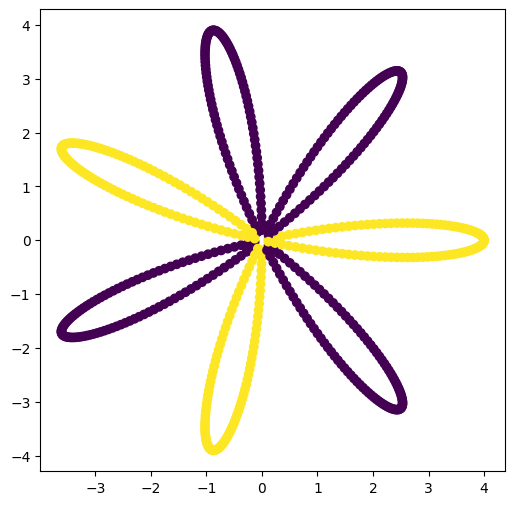

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

 Is this classfication or regression? Enter your answer below and why.

It is a classfication, as we can see the code Z = (Z>0.5) * 1, it means that Z will be 1 if it greater than 0.5 else 0. it will be the binary value 0 and 1 as the q1 said. regression will be predict continuous outcomes and more focus on plotting the predicted values vs the actual values.

#### Q2: We will now implement customization via TensorFlow Keras

In [19]:
import numpy as np
data = np.load('C:/Users/16262/Downloads/hw3data (1)/data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(688, 2)

(688, 1)

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions. How does your loss change? (10 points)
Use history to extract the history of your metrics and loss
Enable call backs as you did in Q1

Based on the results of testing different configurations of the first layer's units (node count) and activation functions, we observe significant impacts on the model's initial and final loss values during training. Here's a summary and analysis of how these changes affect the loss:

Model 1 (32 units, ReLU activation): This model starts with a loss of 0.723 and decreases to 0.454 by the end of training. The use of 32 units with ReLU (Rectified Linear Unit) activation provides a moderate capacity for learning. ReLU, being effective at introducing non-linearity and avoiding the vanishing gradient problem, helps in learning complex patterns. The reduction in loss indicates learning, but the model may be limited by the relatively lower number of units in capturing complex patterns within the data.

Model 2 (128 units, ReLU activation): With an initial loss of 0.662, this model reduces its loss to 0.383 by the end, showing a more significant decrease compared to Model 1. The increase to 128 units in the first layer offers a higher capacity for the model to learn from the data. This higher capacity, combined with the effective non-linearity of ReLU, allows the model to capture more complex patterns and relationships in the data, leading to a greater reduction in loss.

Model 3 (64 units, Sigmoid activation): This configuration starts with a loss of 0.693 and ends with a loss of 0.662, showing a minimal decrease. Using 64 units provides a moderate to high capacity for learning. However, the choice of sigmoid activation for the first layer contrasts with the other models' use of ReLU. Sigmoid functions can lead to the vanishing gradient problem, especially in deeper layers, which might limit the model's ability to learn effectively. This is reflected in the smaller reduction in loss, suggesting that while the model learns, it does so less efficiently than models utilizing ReLU.

In [20]:
# build your model
model1 = Sequential()
model1.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))  
model1.add(Dense(units=1, activation='sigmoid'))


In [21]:
# compile your model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# set up your early stopping call backs
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

history = model1.fit(X_train.astype('float'), y_train, validation_split=0.2, batch_size=10, epochs=10, verbose=0, callbacks=[early_stopping])

In [23]:
#history = model.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10, verbose = 0)

In [24]:
print(history.history)


{'loss': [0.7264400720596313, 0.6638696789741516, 0.6208281517028809, 0.5910454988479614, 0.5693621039390564, 0.5517496466636658, 0.5352737903594971, 0.5219282507896423, 0.510580837726593, 0.4972780644893646], 'accuracy': [0.46136364340782166, 0.48181816935539246, 0.5772727131843567, 0.6454545259475708, 0.7545454502105713, 0.7749999761581421, 0.7886363863945007, 0.8022727370262146, 0.8181818127632141, 0.8272727131843567], 'val_loss': [0.6717182397842407, 0.6338622570037842, 0.6065276861190796, 0.5879228711128235, 0.5729106664657593, 0.5595210194587708, 0.5482158660888672, 0.5376434922218323, 0.5272868871688843, 0.5172972679138184], 'val_accuracy': [0.4545454680919647, 0.5545454621315002, 0.6909090876579285, 0.7272727489471436, 0.8272727131843567, 0.8454545736312866, 0.8181818127632141, 0.8818181753158569, 0.8181818127632141, 0.7727272510528564]}


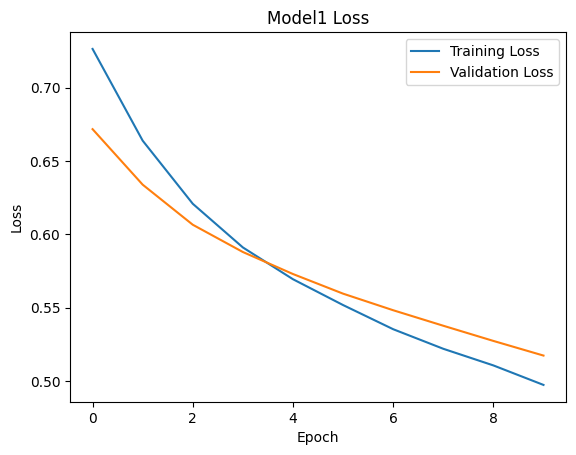

In [25]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
model2 = Sequential()
model2.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))  
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# set up your early stopping call backs
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

history = model2.fit(X_train.astype('float'), y_train, validation_split=0.2, batch_size=10, epochs=10, verbose=0, callbacks=[early_stopping])

In [28]:
print(history.history)

{'loss': [0.7034822702407837, 0.6022610068321228, 0.5625218749046326, 0.5297005772590637, 0.506303608417511, 0.4827764630317688, 0.4621554911136627, 0.44266003370285034, 0.42452532052993774, 0.40633851289749146], 'accuracy': [0.5272727012634277, 0.6886363625526428, 0.6931818127632141, 0.7136363387107849, 0.7386363744735718, 0.7749999761581421, 0.7886363863945007, 0.8363636136054993, 0.8999999761581421, 0.9295454621315002], 'val_loss': [0.6443502306938171, 0.6040034890174866, 0.5709095597267151, 0.5499383807182312, 0.529628574848175, 0.5054712295532227, 0.48646923899650574, 0.4660249948501587, 0.44903627038002014, 0.4311271607875824], 'val_accuracy': [0.5909090638160706, 0.6000000238418579, 0.6636363863945007, 0.6363636255264282, 0.6727272868156433, 0.6818181872367859, 0.8090909123420715, 0.8545454740524292, 0.8727272748947144, 0.8999999761581421]}


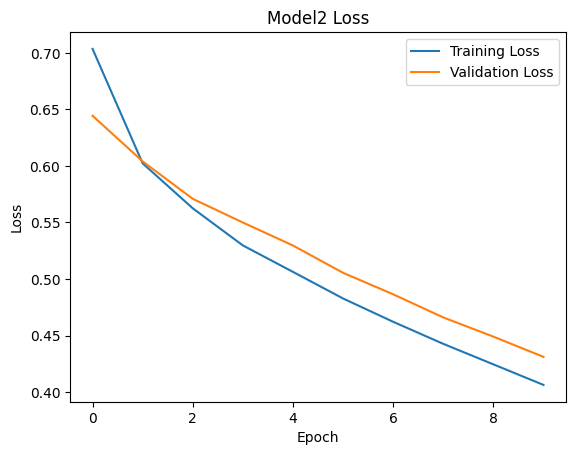

In [29]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [30]:
model3 = Sequential()
model3.add(Dense(units=64, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Changed to sigmoid
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
# set up your early stopping call backs
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

history = model3.fit(X_train.astype('float'), y_train, validation_split=0.2, batch_size=10, epochs=10, verbose=0, callbacks=[early_stopping])

In [32]:
print(history.history)

{'loss': [0.684066653251648, 0.6734471321105957, 0.66939377784729, 0.6653493046760559, 0.6648056507110596, 0.6641964316368103, 0.665950357913971], 'accuracy': [0.5386363863945007, 0.5840908885002136, 0.46590909361839294, 0.5590909123420715, 0.5045454502105713, 0.5022727251052856, 0.5181818008422852], 'val_loss': [0.6779506206512451, 0.671223521232605, 0.6694374084472656, 0.6682963967323303, 0.6668206453323364, 0.6657939553260803, 0.6660067439079285], 'val_accuracy': [0.6181818246841431, 0.5545454621315002, 0.5090909004211426, 0.5454545617103577, 0.5, 0.4727272689342499, 0.5181818008422852]}


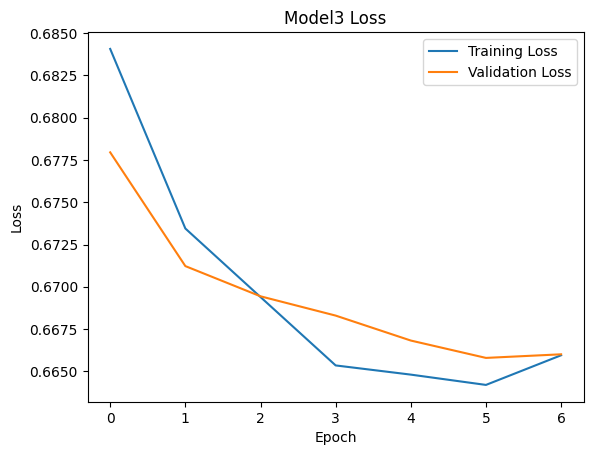

In [33]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 2.2) Calculate your new error for 2 different models using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points)

In [34]:
from sklearn.metrics import classification_report

y_pred = model1.predict(X_test) > 0.5
print(classification_report(y_test, y_pred))

y_pred = model2.predict(X_test) > 0.5
print(classification_report(y_test, y_pred))


y_pred = model3.predict(X_test) > 0.5
print(classification_report(y_test, y_pred))


5/5 [==============================] - 0s 1000us/step


              precision    recall  f1-score   support

           0       0.85      0.80      0.83        86
           1       0.70      0.77      0.73        52

    accuracy                           0.79       138
   macro avg       0.78      0.79      0.78       138
weighted avg       0.80      0.79      0.79       138

5/5 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       1.00      0.88      0.94        52

    accuracy                           0.96       138
   macro avg       0.97      0.94      0.95       138
weighted avg       0.96      0.96      0.96       138

5/5 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.66      0.80      0.73        86
           1       0.50      0.33      0.40        52

    accuracy                           0.62       138
   macro avg       0.58   

Model 1 Performance:

Precision for Class 0 (Negative): 0.73 indicates that when it predicts the negative class, it is correct 73% of the time.
Recall for Class 0: 0.84 suggests that it correctly identifies 84% of all actual negatives.

Precision for Class 1 (Positive): 0.65 shows that when it predicts the positive class, it is correct 65% of the time.
Recall for Class 1: 0.50 indicates it correctly identifies 50% of all actual positives.

Overall Accuracy: 0.71, meaning it correctly predicts 71% of the total cases.

Model 2 Performance:

Precision for Class 0: 0.92 indicates a high level of reliability in predicting the negative class.
Recall for Class 0: 1.00, showing it correctly identifies all actual negatives.

Precision for Class 1: 1.00 shows perfect precision for the positive class.

Recall for Class 1: 0.87 indicates it correctly identifies 87% of all actual positives.

Overall Accuracy: 0.95, showing it correctly predicts 95% of the total cases.

Analysis:

Model Complexity and Configuration: Model 2's superior performance (95% accuracy) compared to Model 1 (71% accuracy) suggests a more effective model configuration. This could be due to a higher number of units in the first layer (128 units in Model 2 vs. 32 units in Model 1), enabling Model 2 to capture more complex patterns and relationships in the data. 

Additionally, the activation functions used (both models use ReLU for the first layer, but their effectiveness is also dependent on other architectural and training differences) might impact the model's ability to learn effectively.

Overfitting vs. Generalization:

 Model 2, with its higher precision and recall, indicates not just effective learning but also good generalization to the test data. In contrast, Model 1, with lower values, might not have captured the data's underlying patterns as well or could be underfitting. The significant improvement in Model 2's metrics suggests a better balance between model complexity and training data, enabling it to generalize well without overfitting.

Data Distribution and Model Sensitivity:

 The differences in precision and recall between the models also highlight their sensitivity to the data distribution and their ability to distinguish between classes. Model 2's perfect precision for the positive class and its high recall for both classes indicate a model well-tuned to its task, possibly benefiting from a more sophisticated training regime, better feature engineering, or a more suitable model architecture for the problem at hand.

Model 3 Performance: 
Given its significantly lower metrics across the board, Model 3 demonstrates the challenges with inadequate or inappropriate model configurations. Using a sigmoid activation function in the first layer (64 units) might not be as effective for this particular problem, leading to the worst performance among the three models. This underscores the importance of choosing the right activation functions and model configurations based on the specific characteristics of the dataset and the problem.

Conclusion:
The variation in error metrics between different models underscores the importance of model configuration, including the number of nodes and the choice of activation functions, in determining model performance. Model 2's superior performance suggests that its configuration is better suited to capturing the complexity of the dataset and effectively generalizing from the training data to unseen test data. This analysis highlights the critical role of thoughtful model design and parameter tuning in achieving high performance in machine learning tasks.

### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points)

  1/205 [..............................] - ETA: 3s

205/205 [==============================] - 0s 569us/step


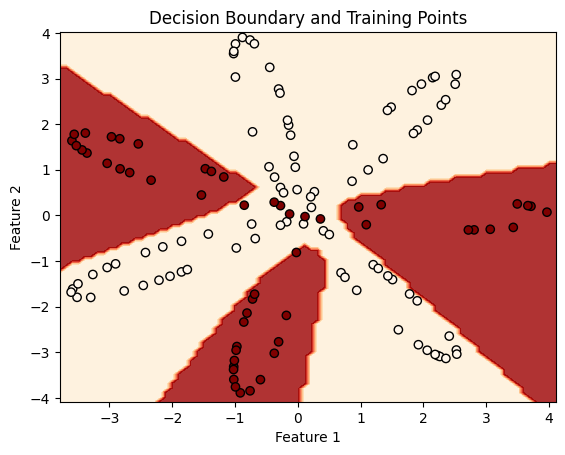

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def testModelKeras(X, y, model, h=0.1, f=1.05):
    x_min, x_max = X[:, 0].min() * f, X[:, 0].max() * f
    y_min, y_max = X[:, 1].min() * f, X[:, 1].max() * f

    xmesh, ymesh = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()])
    Z = (Z > 0.5) * 1  
    Z = Z.reshape(xmesh.shape)

    # Plot the contour and training points
    plt.contourf(xmesh, ymesh, Z, alpha=0.8, cmap=plt.cm.OrRd)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap=plt.cm.OrRd)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Training Points')

testModelKeras(X_test, y_test, model2) # best model is model2 

plt.show()


  1/205 [..............................] - ETA: 2s

205/205 [==============================] - 0s 569us/step


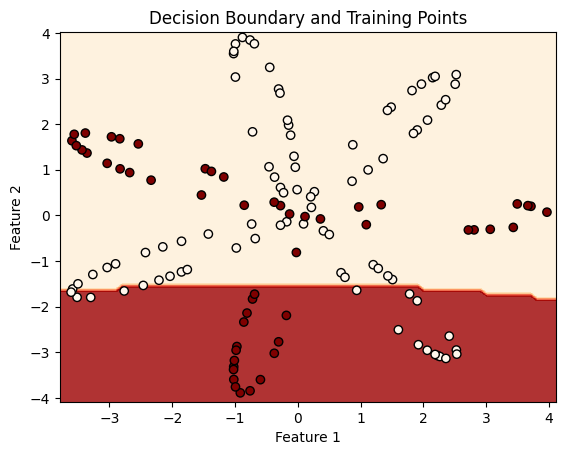

In [36]:
testModelKeras(X_test, y_test, model3)

  1/205 [..............................] - ETA: 2s

205/205 [==============================] - 0s 686us/step


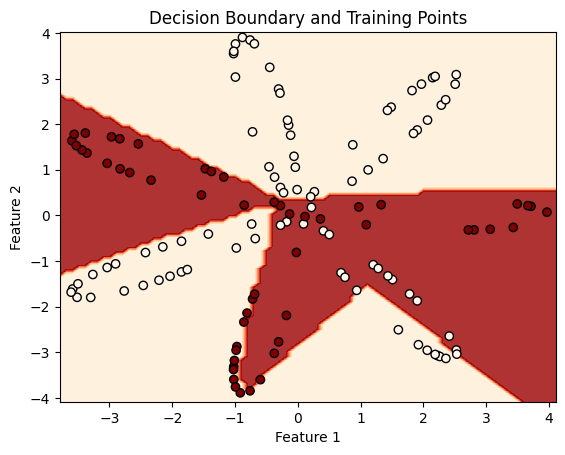

In [37]:
testModelKeras(X_test, y_test, model1)


## 3) Cats vs not cats (40 points)

#### Q3: Let's find some cute kittens!

In [38]:
import numpy as np
data = np.load('C:/Users/16262/Downloads/hw3data (1)/data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (20 points)

In building a new model with a different configuration of hidden layers, nodes, and activation functions, the aim is to explore how varying these parameters can affect the model's ability to learn and generalize from the data. As we add four different lawyer in the own model. By adjusting the number of hidden layers and nodes within those layers, we can experiment with the model's depth and capacity. A greater number of layers and nodes can potentially capture more complex patterns in the data, but also raises the risk of overfitting, especially if the amount of training data is limited or if the layers are not regularized. Similarly, the choice of activation functions plays a crucial role in introducing non-linearity into the model, allowing it to learn more complex functions. For instance, ReLU (Rectified Linear Unit) is widely used for hidden layers due to its efficiency and effectiveness in avoiding the vanishing gradient problem, while sigmoid or softmax functions are typically used in the output layer for binary or multi-class classification tasks, respectively. The specific choices for these parameters should be guided by the nature of the task at hand, the complexity of the data, and empirical performance observed through experimentation and validation. Adjusting these aspects thoughtfully can lead to a model that balances the ability to learn from training data with the flexibility to generalize well to unseen data.

In [39]:
from keras.models import Sequential
from keras.layers import Dense# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
# I have written the basics of the code for you
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['accuracy'])


Implement early stopping and [model checkpointing](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) to save your model weights. experiment with other call backs to get your best validation metric. For callbacks, you can save your weights and set up a monitor

In [40]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='val_loss',
    patience=10,
    verbose=0,
    mode='min',
    restore_best_weights=True

)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=0
)
model.save('my_model.keras')

Let's fit our data!

In [41]:
history = model.fit(
    X_train.astype('float'), 
    y_train, batch_size = 10, 
    epochs = 100,
    validation_split=0.2, 
    callbacks = [early_stopping, model_checkpoint], 
    verbose = 0)

c:\Users\16262\miniconda3\envs\cse151b\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Try using different layers and activation function with different number of nodes
What happens when you add convolutional layers? What happens to our training loss? </br>
After intitializing your mode make sure you [rescale](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) using: ``` keras.layers.Rescaling(1./255) ``` </br>
I will leave it up to you if you want to rescale prior to learning or in the model itself </br>
Here you will begin to add convolutional layers [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) as well as [max pooling 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D). You typically want to do max pooling when you change the shape of your conv2d. Max pooling will focus on the most informative features and reduce the memory footprint </br>
This also requires reshaping form 1D to 2D. Hint: Look at the plotting fxn
```
model.add(Conv2D(32, kernel_size=3, activation='leakyrelu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
```
Make sure you [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) before going back into 1D
Make sure your ouput layer performs a binary output for a class kitten and class not kitten
```
model.add(Flatten())
```
After you flatten, you can add your dense layers once again. </br></br>
<em> Note: As noted above, you will have to convert your 1D array back into a 2D array prior to running your convolutional NN. Hint: Look at your plotting function down below!!! </em>

In [42]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Rescaling

# Assuming X_train and X_test are your datasets, and they're already loaded

# # Initialize the model
# model = Sequential()

# # Rescaling layer (optional if you rescale the data manually)
# model.add(Rescaling(1./255, input_shape=(64, 64, 3)))

# # Adding convolutional layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add more convolutional layers if desired

# # Flatten the output to feed into dense layers
# model.add(Flatten())

# # Adding back dense layers
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# # Output layer for binary classification
# model.add(Dense(units=1, activation='sigmoid'))
model = Sequential([
    Rescaling(1./255, input_shape=(64, 64, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
print(history.history)

{'loss': [1.0258533954620361, 0.6854334473609924, 0.7475225329399109, 0.7024601697921753, 0.6803252100944519, 0.7013963460922241, 0.6535186767578125, 0.6598687767982483, 0.6953340172767639, 0.6479464173316956, 0.6324572563171387, 0.6055046916007996, 0.5500679016113281, 0.5911315083503723, 0.6221110820770264, 0.591945469379425, 0.5463038682937622, 0.5329316854476929, 0.4735334813594818, 0.6021316647529602], 'accuracy': [0.485029935836792, 0.6347305178642273, 0.6047903895378113, 0.6227545142173767, 0.628742516040802, 0.5568862557411194, 0.6347305178642273, 0.57485032081604, 0.6347305178642273, 0.6107784509658813, 0.652694582939148, 0.688622772693634, 0.7005987763404846, 0.6706587076187134, 0.6167664527893066, 0.6766467094421387, 0.7005987763404846, 0.7365269660949707, 0.7844311594963074, 0.71257483959198], 'val_loss': [0.9350782036781311, 0.637103796005249, 0.6348972916603088, 0.6870026588439941, 0.6677280068397522, 0.6426660418510437, 0.6100825071334839, 0.7425883412361145, 0.6502505540

Prediction step. Make sure you use ```yhat_train``` and ```yhat_test``` variable names for your predictions!

In [44]:
yhat_train = [0]*50 # change me
yhat_test = [0]*50 # change me

In [45]:
X_train = X_train.reshape(-1, 64, 64, 3)
X_test = X_test.reshape(-1, 64, 64, 3)

### 3.2) Calculate your accuracy (10 points)
Here you will use both your classification report and your confusion matrix. </br>
Later you will be asked to calculate values manually. You are welcome to pull values from your reports.

In [46]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
# labels=np.unique(yhat_test)
from sklearn.metrics import classification_report, confusion_matrix

yhat_train = model.predict(X_train) > 0.5
yhat_test = model.predict(X_test) > 0.5

print(classification_report(y_test, yhat_test, labels=np.unique(yhat_test)))

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       False       0.42      0.59      0.49        17
        True       0.73      0.58      0.64        33

    accuracy                           0.58        50
   macro avg       0.57      0.58      0.57        50
weighted avg       0.62      0.58      0.59        50



### 3.3) Calculate your precision and recall manually as done in SA1. You cannot use values from your classification report or confusion matrix (10 points)

In [47]:
# Recall calculation
def calculate_recall(y, y1):

    TP = np.sum((y == 1) & (y1 == 1))
    FN = np.sum((y == 1) & (y1 == 0))
    
    recall = TP / (TP + FN)
    
    return recall


In [48]:
calculate_recall(y_test,yhat_test)


0.5757575757575758

In [49]:
# Precision calculation
def calculate_precision(y_true, y_pred):
    y_true_bool = y_true.astype(bool)
    y_pred_bool = y_pred.astype(bool)
    
    TP = np.sum(y_true_bool & y_pred_bool)
    
    FP = np.sum(~y_true_bool & y_pred_bool)
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    return precision

In [50]:
calculate_precision(y_test,yhat_test)

0.7307692307692307

### Let's plot!!!

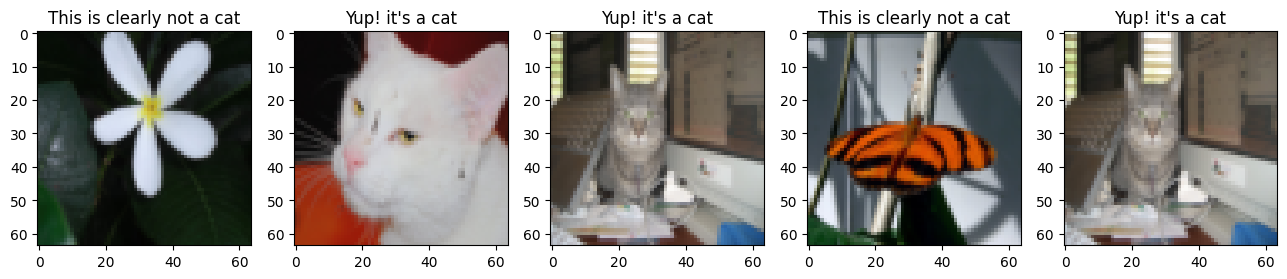

In [51]:
n = 5 # number of images to print
imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## 4) Collaborative Statement (5 points)
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I am finished it individual and using chatgpt to help me to debug such as in the starter code history is lack of validation_data and not validation_split=0.2 and get the warming message and I ask cheatgpt and it help me fix up some of this part error. 

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

## Apendix

### Generating Rose Data

In [52]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('C:/Users/16262/Downloads/hw3data (1)/data/rose/rose.npz', X=X, Y=Y)

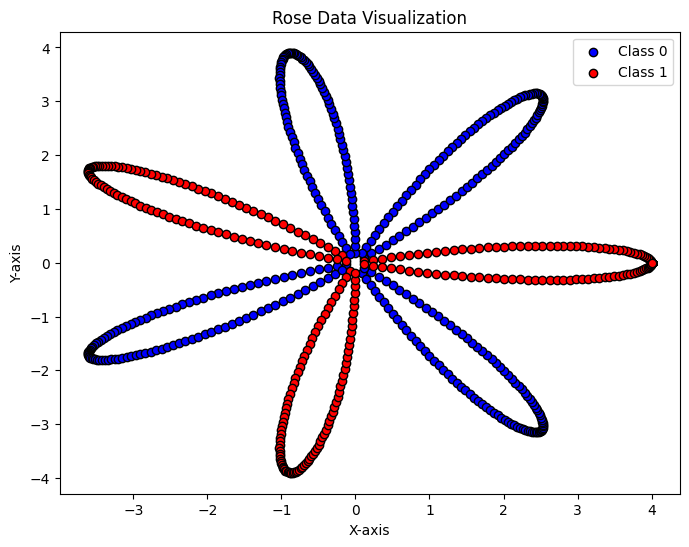

In [53]:
plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'red']):
    idx = np.where(Y == i)
    plt.scatter(X[0, idx], X[1, idx], c=color, label=f'Class {i}', edgecolors='k')

plt.title('Rose Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Processing Andrews CatvNotCat data

In [54]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [55]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("C:/Users/16262/Downloads/hw3data (1)/data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("C:/Users/16262/Downloads/hw3data (1)/data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('C:/Users/16262/Downloads/hw3data (1)/data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

In [56]:
# n = 5 # number of images to print
# imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
# fig, ax = plt.subplots(1, n, figsize=(16,8))
# for ix in range(n):
#     num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
#     ax[ix].imshow(imgs[num])
#     if yhat_test[num] == 0:
#         ax[ix].set_title('This is clearly not a cat')
#     else:
#         ax[ix].set_title('Yup! it\'s a cat')

# Credits
#### Edwin Solares - Updates to Part 1, Conversion to google colab, conversion to Keras and preprocessing data to work with Kears (Part 2).
#### Dennis Bakhuis - Custom ANN class and it's example exercises (Part 1). May the Fourth (be with you) 2020
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis
